# Unidad 5: Modelos conexionistas

In [2]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: GTK3Agg
Populating the interactive namespace from numpy and matplotlib


# Modelos conexionistas
## Introducción a Theano

In [2]:
import theano
import theano.tensor as T
import numpy

Operaciones básicas con variables en Theano

In [4]:
x = T.scalar('x')
y = x ** 2

y.eval({x : 2})

array(4.)

También es posible realizar operaciones más complejas

In [4]:
x = T.scalar('x')
y = T.scalar('y')
z = 2 * x + 3 * y

z.eval({x: 1, y : 10})

array(32.)

Evaluación mediante funciones 

In [5]:
f = theano.function(inputs=[x, y], outputs = z)
f(1, 2)

array(8.)

In [8]:
x = T.scalar('x')
y = T.scalar('y')

def sum_vars(x, y):
    return x + y

z = sum_vars(x, y)

f = theano.function(inputs = [x, y], outputs = z)
f(1, 2)

array(3.)

In [9]:
x = T.scalar('x')
y = cos(x)

f = theano.function(inputs = [x], outputs = y)

f(0)

NameError: name 'cos' is not defined

In [12]:
x = T.scalar('x')

y = T.switch(T.gt(x, 0), x, -x)

f = theano.function(inputs = [x], outputs = y)

print("abs(3) = ", f(3))
print("abs(-3) = ", f(-3))

abs(3) =  3.0
abs(-3) =  3.0


In [17]:
import time
from theano.ifelse import ifelse

a, b = T.scalars('a', 'b')
x, y = T.matrices('x', 'y')

z_switch = T.switch(T.lt(a, b), T.mean(x), T.mean(y))
z_ifelse = ifelse(T.lt(a, b), T.mean(x), T.mean(y))

f_switch = theano.function([a, b, x, y], z_switch)
f_ifelse = theano.function([a, b, x, y], z_ifelse)

val1 = 0.
val2 = 1.
big_mat = numpy.ones((15000, 15000))

tic = time.clock()
f_switch(val1, val2, big_mat, big_mat)
print('El tiempo utilizando switch es %f' % (time.clock() - tic))

tic = time.clock()
f_ifelse(val1, val2, big_mat, big_mat)
print('El tiempo utilizando switch es %f' % (time.clock() - tic))

MemoryError: Unable to allocate array with shape (15000, 15000) and data type float64

In [3]:
x = T.scalar('x')
y = T.scalar('y')

z  = x * y

f = theano.function(inputs = [x, theano.In(y, value = 3)], outputs= z)

print(f(10))
print(f(10, 2))

30.0
20.0


In [12]:
import numpy as np
x = theano.shared(np.array(1, dtype = theano.config.floatX))
A = T.scalar()
f = theano.function(inputs = [A], outputs = x, updates = {x: x - A})

print(f(np.array(3)))
print(x.get_value())

1.0
-2.0
3


In [12]:
x = theano.shared(np.array([[1, 2], [3, 4]], dtype = theano.config.floatX))
A = T.matrix()
f = theano.function(inputs = [A], outputs = x, updates = {x: x - A})

print(f(np.array([[1, 1], [1, 1]])))
print(x.get_value())

[[ 1.  2.]
 [ 3.  4.]]
[[ 0.  1.]
 [ 2.  3.]]


In [6]:
W = T.matrix('W')
v = T.vector('v')
b = T.vector('biases')

x = T.dot(v, W) + b

f = theano.function(inputs = [v, W, b], outputs = x)

f([1,1], [[2,4],[3,5]], [2, 3])

array([ 7., 12.])

In [8]:
x = T.scalar()
y = x**2

# y_grad = dy/dx
y_grad = T.grad(y, x)

# dy/dx = 2 * x
y_grad.eval({x: 10})

[-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82 -0.8  -0.78
 -0.76 -0.74 -0.72 -0.7  -0.68 -0.66 -0.64 -0.62 -0.6  -0.58 -0.56 -0.54
 -0.52 -0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3
 -0.28 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06
 -0.04 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18
  0.2   0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42
  0.44  0.46  0.48  0.5   0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66
  0.68  0.7   0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9
  0.92  0.94  0.96  0.98  1.  ]


Uso de Theano para la estimación de una regresión.

En Theano se puede utilizar el gradiente para implementar una función de coste y realizar una estimación lineal.

In [15]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.50 + 10

X = T.scalar()
Y = T.scalar()

def model(X, w, c):
    return X * w + c

w = theano.shared(np.asarray(0., dtype = theano.config.floatX))
c = theano.shared(np.asarray(0., dtype = theano.config.floatX))
y = model(X, w, c)

cost     = T.mean(T.sqr(y - Y))
gradient_w = T.grad(cost = cost, wrt = w)
gradient_c = T.grad(cost = cost, wrt = c)
updates  = [[w, w - gradient_w * 0.01], [c, c - gradient_c * 0.01]]

train = theano.function(inputs = [X, Y], outputs = cost, updates = updates)

for i in range(15):
    for x, y in zip(trX, trY): 
        cost_i = train(x, y)
    print('En el paso', i, 'el valor de w es', w.get_value(),
           'y c es', c.get_value(), 'con un coste', cost_i)

En el paso 0 el valor de w es -0.8755990507084165 y c es 9.743929526485037 con un coste 10.211863536721319
En el paso 1 el valor de w es 0.3011340183135095 y c es 10.48354962022911 con un coste 1.438559022181478
En el paso 2 el valor de w es 1.1014606312263484 y c es 10.325663825694027 con un coste 0.2811017080731912
En el paso 3 el valor de w es 1.5320001511248693 y c es 10.178338633265097 con un coste 0.05530743679964585
En el paso 4 el valor de w es 1.7528699881811411 y c es 10.095313793986623 con un coste 0.008388140594711362
En el paso 5 el valor de w es 1.8648958969673224 y c es 10.052271460924619 con un coste 0.0003892295468112534
En el paso 6 el valor de w es 1.9215553787206967 y c es 10.030383930465012 con un coste 0.0002719821484806803
En el paso 7 el valor de w es 1.9501918072473574 y c es 10.019306718491812 con un coste 0.0012098384360926134
En el paso 8 el valor de w es 1.9646624475688674 y c es 10.013707248610137 con un coste 0.0019380715817665533
En el paso 9 el valor de

## Implementación de un perceptrón con Theano

En primer lugar vamos a definir una red neuronal que toma las entradas y utiliza los pesos para determinar la salida. Inicialmente definidos una neurona que calcula la salida `a`. La representación se puede observar en la figura 5.1 de la unidad.

donde el vector $x$ es $[x_1, x_2]$ y $w$ es$[w_1, w_2]$.

In [13]:
# Definición de las variables simbólicas
x = T.vector('x')

# Definición de las variables compartidas
w = theano.shared(np.array([1, 1], dtype = theano.config.floatX))
b = theano.shared(-1.5)

# Definición de la neurona
z = T.dot(x, w) + b
a = T.switch(T.lt(z, 0), 0, 1)

# Conjunto de datos
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]

# Creación de la función
neuron = theano.function([x], a)

# Iteramos sobre todas las entradas
for i in range(len(inputs)):
    t = inputs[i]
    out = neuron(t)
    print('El resultado para [%d, %d] es %d' % (t[0], t[1], out))

El resultado para [0, 0] es 0
El resultado para [0, 1] es 0
El resultado para [1, 0] es 0
El resultado para [1, 1] es 1


Se puede observar que los resultados son los mismos en ambos casos.

# Propagación hacia atrás
Ahora es necesario modificar el código anterior para introducir la función de error y entrenar la red neuronal.

In [4]:
# Definición de las variables simbólicas
x = T.matrix('x')
w = theano.shared(np.array([1, 1], dtype = theano.config.floatX))
b = theano.shared(1.0)
learning_rate = 0.01

# Definición de la neurona
z = T.dot(x, w) + b
a = 1 / (1 + T.exp(-z))

# Definición de la función de coste
a_hat = T.vector('a_hat')
cost = -(a_hat * T.log(a) + (1 - a_hat) * T.log(1 - a)).sum()

# Gradiente de la función de coste
dw, db = T.grad(cost, [w, b])

train = theano.function(
    inputs = [x, a_hat],
    outputs = [a, cost],
    updates = [[w, w - learning_rate * dw], [b, b - learning_rate * db]])

En este caso se han introducido unos cambios respecto a la implementación anterior. En primer lugar, se ha definido `x` como una matriz en lugar de un vector. Esto es para tener un enfoque vectorizado en donde se determinan todos los resultados de forma conjunta y se puede obtener los costes necesarios para implementar los gradientes. Por otro lado, se ha cambiado la forma de la neurona, `a`, de una función escalón a una función logística.

También se ha de tener en cuenta que se va a utilizar el gradiente descendiente para obtener los pesos por lotes, es decir, usaremos todas las observaciones de entrenamiento para actualizar los pesos.

Los resultados de la red son:
El resultado para [0, 0] es 0.00
El resultado para [0, 1] es 0.01
El resultado para [1, 0] es 0.01
El resultado para [1, 1] es 0.98
El vector w es [8.37, 8.37]
El valor del bias es -12.73


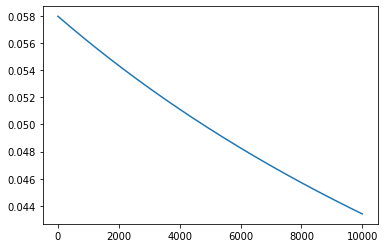

In [19]:
import matplotlib.pyplot as plt
# Conjunto de datos de entrenamiento
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]     inputs = [[trx1,try1],
                                                       trx2, try2].
                                                        trxn,tryn]
outputs = [0,0,0,1]

# Iteramos sobre el conjunto de entrenamiento 
cost = []
for iteration in range(10000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
# Se imprimen los resultados por pantalla
print('Los resultados de la red son:')
for i in range(len(inputs)):
    print('El resultado para [%d, %d] es %.2f' % (inputs[i][0], inputs[i][1], pred[i]))
    
# Resultados
print('El vector w es [%.2f, %.2f]' % (w.get_value()[0], w.get_value()[0]))
print('El valor del bias es %.2f' % b.get_value())

# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)

En este ejemplo se puede ver como tras el entrenamiento la red neuronal puede reproducir los resultados deseados.

## Red neuronal con dos capas
Ahora vamos a implementar una red neuronal con dos capas. En la primera capa vamos a utilizar dos neuronas y en la segunda tres. Con esta red neuronal se va a entrenar para poder reproducir una función `XNOR` los siguientes resultados:

X1 | X2 | out
-- | -- | --
0 | 0 | 1
0 | 1 | 0
1 | 0 | 0
1 | 1 | 1

Una representación de esta red neuronal se puede observar en la siguiente figura

![Modelo red neuronal](U5_Modelo.002.png)

donde el vector $x$ es $[x_1, x_2]$, $w_1$ es$[w_{11}, w_{12}]$, $w_2$ es$[w_{21}, w_{22}]$ y $w_3$ es$[w_{31}, w_{32}]$.

En primer lugar se definen las variables

In [19]:
x = T.matrix('x')
w1 = theano.shared(np.array([.1, .2], dtype = theano.config.floatX))
w2 = theano.shared(np.array([.3, .4], dtype = theano.config.floatX))
w3 = theano.shared(np.array([.5, .6], dtype = theano.config.floatX))
b1 = theano.shared(1.)
b2 = theano.shared(1.)
learning_rate = 0.01

En segundo lugar se han de definir las neuronas y la relación entre las mismas.

In [20]:
a1 = 1 / (1 + T.exp(-T.dot(x, w1) - b1))
a2 = 1 / (1 + T.exp(-T.dot(x, w2) - b1))
x2 = T.stack([a1, a2], axis = 1)
a3 = 1 / (1 + T.exp(-T.dot(x2, w3) - b2))

Posteriormente se ha de definir la función para el entrenamiento de la red. Esto se hace utilizando la función de coste y el gradiente.

In [21]:
a_hat = T.vector('a_hat')
cost = -(a_hat * T.log(a3) + (1 - a_hat) * T.log(1 - a3)).sum()
dw1, dw2, dw3, db1, db2 = T.grad(cost, [w1, w2, w3, b1, b2])

train = theano.function(
    inputs = [x,a_hat],
    outputs = [a3,cost],
    updates = [
        [w1, w1 - learning_rate * dw1],
        [w2, w2 - learning_rate * dw2],
        [w3, w3 - learning_rate * dw3],
        [b1, b1 - learning_rate * db1],
        [b2, b2 - learning_rate * db2]
    ]
)

Finalmente, se puede realizar al entrenamiento de la red neuronal.

Los resultados de la red son:
El resultado para [0, 0] es 0.99
El resultado para [0, 1] es 0.01
El resultado para [1, 0] es 0.01
El resultado para [1, 1] es 0.99
El vector w1 es [4.17, 4.17]
El vector w2 es [9.55, 9.55]
El vector w3 es [12.83, 12.83]
El valor del bias 1 es -6.25
El valor del bias 2 es 4.64


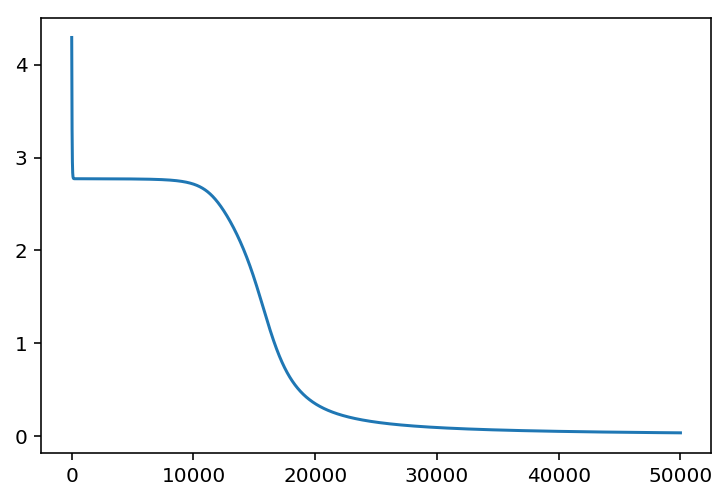

In [22]:
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [1, 0, 0, 1]

# Iteramos sobre el conjunto de entrenamiento 
cost = []
for iteration in range(50000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
# Se imprimen los resultados por pantalla
print('Los resultados de la red son:')
for i in range(len(inputs)):
    print('El resultado para [%d, %d] es %.2f' % (inputs[i][0], inputs[i][1], pred[i]))

# Resultados
print
print('El vector w1 es [%.2f, %.2f]' % (w1.get_value()[0], w1.get_value()[0]))
print('El vector w2 es [%.2f, %.2f]' % (w2.get_value()[0], w2.get_value()[0]))
print('El vector w3 es [%.2f, %.2f]' % (w3.get_value()[0], w3.get_value()[0]))
print('El valor del bias 1 es %.2f' % b1.get_value())
print('El valor del bias 2 es %.2f' % b2.get_value())

# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)

En la figura se puede observar que es hay una reducción de la función de esfuerzo después de 20000 iteraciones. Por lo que en este caso ha sido necesario aumentar el tiempo de entrenamiento respecto a ejemplo anterior.

En este ejemplo, al igual que el anterior, se puede ver como tras el entrenamiento la red neuronal puede reproducir los resultados deseados.

In [23]:
def floatX(X):
    return np.asarray(X, dtype = theano.config.floatX)

def init_weights(shape):
    return theano.shared(floatX(np.random.randn(*shape) * 0.01))

In [24]:
# Semilla
rng = np.random.RandomState(1)

# Bias
b1 = theano.shared(1.)
b2 = theano.shared(1.)

# Pesos iniciales aleatorios
w1 = init_weights((2, 3))
w2 = init_weights((3, 1))

# Definición de la red
a1 = T.nnet.sigmoid(T.dot(x, w1) + b1)
a2 = T.nnet.sigmoid(T.dot(a1, w2) + b2)
a3 = T.flatten(a2)

# Función de esfuerzo
cost = T.nnet.binary_crossentropy(a3, a_hat).mean()

# Función de entrenamiento
train = theano.function(inputs = [x, a_hat],
                        outputs = [a3, cost],
                        updates = [
                            (w1, w1 - learning_rate * T.grad(cost, w1)),
                            (w2, w2 - learning_rate * T.grad(cost, w2)),
                            (b1, b1 - learning_rate * T.grad(cost, b1)),
                            (b2, b2 - learning_rate * T.grad(cost, b2))
                        ])

Los resultados de la red son:
El resultado para [0, 0] es 0.99
El resultado para [0, 1] es 0.01
El resultado para [1, 0] es 0.01
El resultado para [1, 1] es 0.99


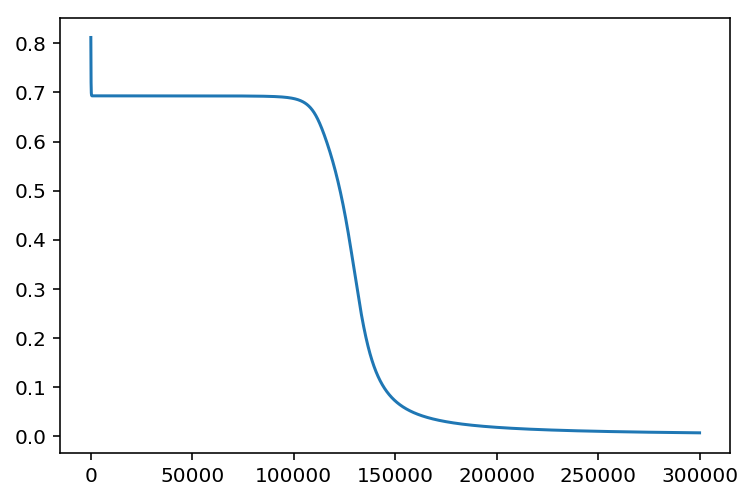

In [25]:
learning_rate = 0.1

inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]
outputs = [1, 0, 0, 1]

# Iteramos sobre el conjunto de entrenamiento 
cost = []
for iteration in range(300000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
# Se imprimen los resultados por pantalla
print('Los resultados de la red son:')
for i in range(len(inputs)):
    print('El resultado para [%d, %d] es %.2f' % (inputs[i][0], inputs[i][1], pred[i]))

# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)

### Redes neuronales

In [26]:
import os

datasets_dir = ''

def one_hot(x,n):
    if type(x) == list:
        x = np.array(x)
    x = x.flatten()
    o_h = np.zeros((len(x),n))
    o_h[np.arange(len(x)),x] = 1
    return o_h

def mnist(ntrain=60000,ntest=10000,onehot=True):
    data_dir = os.path.join(datasets_dir,'mnist/')
    fd = open(os.path.join(data_dir,'train-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    trX = loaded[16:].reshape((60000,28*28)).astype(float)

    fd = open(os.path.join(data_dir,'train-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    trY = loaded[8:].reshape((60000))

    fd = open(os.path.join(data_dir,'t10k-images-idx3-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    teX = loaded[16:].reshape((10000,28*28)).astype(float)

    fd = open(os.path.join(data_dir,'t10k-labels-idx1-ubyte'))
    loaded = np.fromfile(file=fd,dtype=np.uint8)
    teY = loaded[8:].reshape((10000))

    trX = trX/255.
    teX = teX/255.

    trX = trX[:ntrain]
    trY = trY[:ntrain]

    teX = teX[:ntest]
    teY = teY[:ntest]

    if onehot:
        trY = one_hot(trY, 10)
        teY = one_hot(teY, 10)
    else:
        trY = np.asarray(trY)
        teY = np.asarray(teY)

    return trX,teX,trY,teY

trX, teX, trY, teY = mnist()

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


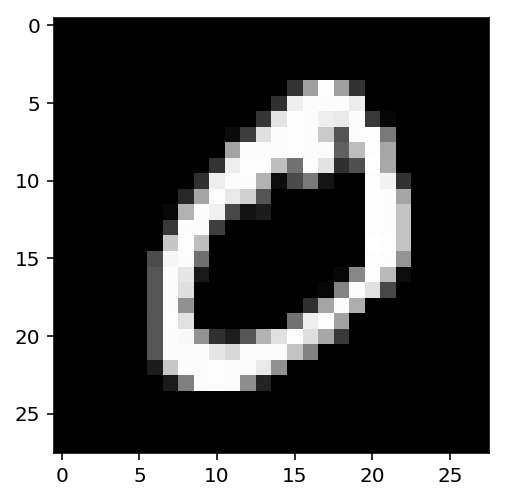

In [27]:
print(trY[1,:])
imshow(trX[1,:].reshape(28, 28), cmap = mpl.cm.gray)
show()

In [28]:
num_iter = 25

In [29]:
trX, teX, trY, teY = mnist()

X = T.fmatrix()
Y = T.fmatrix()

w = init_weights((784, 10))

py_x = T.nnet.sigmoid(T.dot(X, w))

y_pred = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
gradient = T.grad(cost, w)
update = [[w, w - gradient * 0.1]]

train = theano.function(inputs = [X, Y],
                        outputs = cost,
                        updates = update,
                        allow_input_downcast=True)
predict = theano.function(inputs = [X],
                          outputs = y_pred,
                          allow_input_downcast = True)

for i in range(num_iter):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print(i, np.mean(np.argmax(teY, axis=1) == predict(teX)), cost)

0 0.7184 0.0027113808707702686
1 0.6985 0.0012385211698059896
2 0.6882 0.0007838883255393472
3 0.6819 0.0005668123566272693
4 0.6772 0.00044081916361153297
5 0.6731 0.00035897771250807675
6 0.6699 0.00030175442866098344
7 0.6677 0.00025960789144645243
8 0.6642 0.00022733952679028523
9 0.6625 0.00020188189812114245
10 0.6602 0.0001813113902869248
11 0.659 0.00016436220952186048
12 0.659 0.00015016827534227394
13 0.6581 0.00013811753963719186
14 0.6564 0.00012776554953914743
15 0.6552 0.00011878197306478028
16 0.6543 0.0001109163218291928
17 0.6537 0.00010397529770792948
18 0.6527 9.780741845702677e-05
19 0.6522 9.229233707665133e-05
20 0.6512 8.73332670486518e-05
21 0.65 8.285151038735447e-05
22 0.6493 7.878243884566545e-05
23 0.6488 7.507249798187683e-05
24 0.6481 7.167694332048722e-05


In [30]:
w = init_weights((784, 10))

py_x = T.nnet.softmax(T.dot(X, w))

y_pred = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
gradient = T.grad(cost, w)
update = [[w, w - gradient * 0.1]]

train = theano.function(inputs = [X, Y],
                        outputs = cost,
                        updates = update,
                        allow_input_downcast = True)
predict = theano.function(inputs = [X],
                          outputs = y_pred,
                          allow_input_downcast = True)

for i in range(num_iter):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print(i, np.mean(np.argmax(teY, axis=1) == predict(teX)), cost)

0 0.8968 0.14184835025904016
1 0.9068 0.11189041093396712
2 0.9111 0.09973462413226064
3 0.9134 0.09274567145779154
4 0.9154 0.08808961807390324
5 0.9167 0.08472243351313298
6 0.9176 0.08215588519868591
7 0.9181 0.08012640683743015
8 0.9193 0.078477281761429
9 0.9195 0.07710862631320858
10 0.9201 0.07595336793412116
11 0.9204 0.07496459733341321
12 0.9204 0.0741084183281691
13 0.9207 0.07335967093998254
14 0.9204 0.0726992535768074
15 0.9204 0.07211238212486673
16 0.9211 0.07158742187340277
17 0.9211 0.07111508242108017
18 0.9212 0.07068784968753837
19 0.9214 0.0702995769160153
20 0.922 0.06994518475575577
21 0.922 0.06962043771337514
22 0.9223 0.06932177505139175
23 0.9224 0.06904618114801483
24 0.9224 0.068791084888923


In [31]:
w_h = init_weights((784, 625))
w_o = init_weights((625, 10))

h = T.nnet.sigmoid(T.dot(X, w_h))
py_x = T.nnet.softmax(T.dot(h, w_o))
y_x = T.argmax(py_x, axis = 1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
updates = [[w_h, w_h - T.grad(cost, w_h) * 0.1],
          [w_o, w_o - T.grad(cost, w_o) * 0.1] ]

train = theano.function(inputs = [X, Y], 
                        outputs = cost,
                        updates = updates,
                        allow_input_downcast = True)
predict = theano.function(inputs = [X],
                          outputs = y_x,
                          allow_input_downcast = True)

for i in range(num_iter):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print(i, np.mean(np.argmax(teY, axis=1) == predict(teX)), cost)

0 0.8209 0.3660942278791161
1 0.8762 0.15094803977133905
2 0.8907 0.11341399596717033
3 0.8975 0.09824648689637272
4 0.9046 0.08927314796175757
5 0.9077 0.08288590920154947
6 0.9094 0.07793396656359496
7 0.9121 0.0739426629727847
8 0.9135 0.07065923822555921
9 0.9146 0.06791980716333451
10 0.9154 0.0656058292542961
11 0.9167 0.06362728130537049
12 0.9176 0.06191441020089242
13 0.9189 0.0604126113859802
14 0.9207 0.059078780881881364
15 0.922 0.05787860941040693
16 0.9232 0.056784587154620876
17 0.9241 0.05577456309747539
18 0.9252 0.05483072231926931
19 0.9264 0.05393885568893866
20 0.9278 0.05308781063303473
21 0.9289 0.052269023976727176
22 0.9303 0.0514760509784847
23 0.9314 0.05070403563224464
24 0.9331 0.04994912568751235


## Dropout

In [32]:
from theano.sandbox.rng_mrg import MRG_RandomStreams

srng = MRG_RandomStreams()

def dropout(X, p):
    if p > 0:
        X *= srng.binomial(X.shape, p = 1 - p, dtype = theano.config.floatX)
        X /= 1 - p
    return X

def model(X, w_h, w_o, p_drop):
    X = dropout(X, p_drop)
    h = T.nnet.sigmoid(T.dot(X, w_h))
    
    h = dropout(h, p_drop)
    py_x = T.nnet.softmax(T.dot(h, w_o))

    return h, py_x

In [33]:
w_h = init_weights((784, 625))
w_o = init_weights((625, 10))

# Modelo de entrenamiento
h, py_x = model(X, w_h, w_o, 0.05)
y_x = T.argmax(py_x, axis = 1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
updates = [[w_h, w_h - T.grad(cost, w_h) * 0.1],
          [w_o, w_o - T.grad(cost, w_o) * 0.1] ]

train = theano.function(inputs = [X, Y], 
                        outputs = cost,
                        updates = updates,
                        allow_input_downcast = True)

# Modelo para evaluación, con p == 0
h_predict, py_predict = model(X, w_h, w_o, 0.0)
y_predict = T.argmax(py_predict, axis = 1)

predict = theano.function(inputs = [X],
                          outputs = y_predict,
                          allow_input_downcast = True)

# Evaluación del modelo
for i in range(num_iter):
    for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
        cost = train(trX[start:end], trY[start:end])
    print(i, np.mean(np.argmax(teY, axis=1) == predict(teX)), cost)

0 0.8211 0.38745985148531814
1 0.8756 0.17285337541162574
2 0.8905 0.11504819858343733
3 0.9002 0.11104068146093327
4 0.9034 0.09149403110392891
5 0.9081 0.09789147012238728
6 0.9108 0.07902562127593916
7 0.9119 0.07835407878519338
8 0.9143 0.08510551108829707
9 0.9155 0.07540898685457945
10 0.916 0.08661333733771943
11 0.9174 0.08127063673288878
12 0.919 0.06612660718563704
13 0.9215 0.06726362332035718
14 0.9231 0.0611035174209245
15 0.9251 0.06601688354989929
16 0.9256 0.07330387338893764
17 0.9266 0.0582438692948961
18 0.9287 0.06645366442435799
19 0.9293 0.059271009347903705
20 0.9315 0.057454947588437486
21 0.9334 0.06356612619325923
22 0.9339 0.05031238959195784
23 0.9351 0.06689939732428261
24 0.9367 0.04737958979132951
